# Extra exercise

1\. Load 'A1B_north_america.nc' from the iris sample data

In [1]:
import iris
filename = iris.sample_data_path("A1B_north_america.nc")
cube = iris.load_cube(filename)
print(cube)

air_temperature / (K)               (time: 240; latitude: 37; longitude: 49)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Auxiliary coordinates:
          forecast_period                x              -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m
     Attributes:
          Conventions: CF-1.5
          Model scenario: A1B
          STASH: m01s03i236
          source: Data from Met Office Unified Model 6.05
     Cell methods:
          mean: time (6 hour)


/Users/dawson/miniconda3/envs/pfcs/lib/python3.5/site-packages/iris/fileformats/cf.py:1140: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


2\. Extract just data from the year 1980 and beyond from the loaded cube

In [2]:
tcoord = cube.coord('time')

def since_1980(cell):
    return tcoord.units.num2date(cell.point).year >= 1980

tcon = iris.Constraint(time=since_1980)
cube = cube.extract(tcon)

In [4]:
tcoord = cube.coord('time')

print(tcoord.units.num2date(tcoord.points.min()))
print(tcoord.units.num2date(tcoord.points.max()))

1980-06-01 00:00:00
2099-06-01 00:00:00


3\. Define a function which takes a coordinate and a single time point as arguments, and returns the decade. For example, your function should return 2010 for the following:

       time = iris.coords.DimCoord([10], 'time', units='days since 2018-01-01')
       print your_decade_function(time, time.points[0])

In [5]:
def get_decade(coord, point):
    year = coord.units.num2date(point).year
    return (year // 10) * 10

time = iris.coords.DimCoord([10], 'time', units='days since 2018-01-01')
print(get_decade(time, time.points[0]))

2010


4\. Add a "decade" coordinate to the loaded cube using your function and the coord categorisation module

In [6]:
import iris.coord_categorisation as coord_cat

coord_cat.add_categorised_coord(cube, 'decade', 'time', get_decade)
print(cube.coord('decade'))

AuxCoord(array([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1990,
       1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 2000, 2000,
       2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2020, 2020, 2020, 2020,
       2020, 2020, 2020, 2020, 2020, 2020, 2030, 2030, 2030, 2030, 2030,
       2030, 2030, 2030, 2030, 2030, 2040, 2040, 2040, 2040, 2040, 2040,
       2040, 2040, 2040, 2040, 2050, 2050, 2050, 2050, 2050, 2050, 2050,
       2050, 2050, 2050, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060,
       2060, 2060, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070,
       2070, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080,
       2090, 2090, 2090, 2090, 2090, 2090, 2090, 2090, 2090, 2090]), standard_name=None, units=Unit('1'), long_name='decade')


5\. Calculate the decadal means cube for this scenario

In [7]:
import iris.analysis

cube = cube.aggregated_by('decade', iris.analysis.MEAN)
print(cube)

air_temperature / (K)               (time: 12; latitude: 37; longitude: 49)
     Dimension coordinates:
          time                           x             -              -
          latitude                       -             x              -
          longitude                      -             -              x
     Auxiliary coordinates:
          decade                         x             -              -
          forecast_period                x             -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m
     Attributes:
          Conventions: CF-1.5
          Model scenario: A1B
          STASH: m01s03i236
          source: Data from Met Office Unified Model 6.05
     Cell methods:
          mean: time (6 hour)
          mean: decade


/Users/dawson/miniconda3/envs/pfcs/lib/python3.5/site-packages/iris/coords.py:495: VisibleDeprecationWarning: an index can only have a single Ellipsis (`...`); replace all but one with slices (`:`).
  bounds = bounds[keys + (Ellipsis, )]


6\. Create a figure with 3 rows and 4 columns displaying the decadal means, with the decade displayed prominently in each axes' title (hint: the `slices` or `slices_over` method of the cube will be helpful, especially combined with the built-in `enumerate` function in a for-loop)

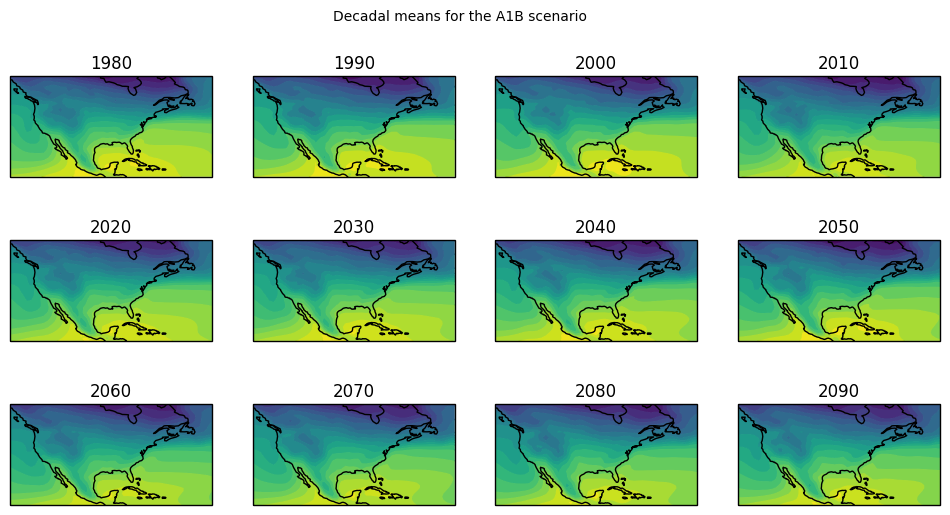

In [9]:
import matplotlib.pyplot as plt
import iris.plot as iplt

plt.figure(figsize=(12, 6))

plt.suptitle('Decadal means for the A1B scenario')
for i, decade_cube in enumerate(cube.slices(['latitude', 'longitude'])):
    plt.subplot(3, 4, i+1)
    iplt.contourf(decade_cube, 20, cmap='viridis')
    plt.title('{}'.format(decade_cube.coord('decade').points[0]))
    plt.gca().coastlines()
plt.show()